<a href="https://colab.research.google.com/github/DevRichan/PF-2-Data-Science-in-Telco-Data-Cleansing/blob/master/Data_Science_in_Telco_(Data_Cleansing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

In [ ]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7113, 22)

##  I. Number of Customers

In [ ]:
## number of customers
df['customerID'].nunique()

7017

## II. Filtering customerID with Specific Format

Format : 
- The lenght of the characthers is 11-12
- It only consist of numbers, no characthers other than numbers.
- Starting with the number 45 the firts 2 digit

Example :
45759018157

In [ ]:
df['valid_id'] = df['customerID'].astype(str).str.match(r'45\d{9,10}') 

In [ ]:
# filtered data
df = df[df['valid_id'] == True]
print("Total Data = ", len(df))

Total Data =  7006


In [ ]:
#delete valid_id column
df.drop('valid_id',axis=1)
df

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN,True
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN,True
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN,True
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN,True


## III. Filtering for Duplicate customerID Numbers

In [ ]:
# Drop duplicates rows
df.drop_duplicates()
# Drop duplicates id sorted by periode 
df = df.sort_values('UpdatedAt',ascending=False)
df = df.drop_duplicates('customerID')

In [ ]:
df

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
4727,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No,True
4738,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes,True
4737,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No,True
4736,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,202006,45184632574,Female,1,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,70.15,Yes,True
2367,202006,45023517923,Female,0,No,No,1.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,Yes,True
2368,202006,45665022680,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No,True
2369,202006,45957014561,Male,0,No,No,64.0,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),99.25,6549.45,No,True


In [ ]:
#Total data after filtering
print(df['customerID'].count())

6993


## IV. Resolving Missing Values by Deleting Rows

In [ ]:
# Missing values column churn 
missing_churn = df['Churn'].isnull().sum()
print("Total missing values = ",missing_churn)

Total missing values =  43


In [ ]:
df.dropna(subset=['Churn'],inplace=True)

In [ ]:
missing_churn = df['Churn'].isnull().sum()
print("Total missing values = ",missing_churn)

Total missing values =  0


In [ ]:
print("Total data = ", len(df))

Total data =  6950


## V - Resolving Missing Values by Filling in Specific Values

In [ ]:
# Status Missing Values from all columns
df.isnull().values.any()

True

In [ ]:
# Number of missing values for each columns
df.isnull().sum().sort_values(ascending=False)

tenure              99
MonthlyCharges      26
TotalCharges        15
valid_id             0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineBackup         0
OnlineSecurity       0
Churn                0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

In [ ]:
# Handling missing values Tenure fill with 11
df['tenure'].fillna(11,inplace=True)

In [ ]:
# Handling missing values num vars(except Tenure)
for col_name in list(['MonthlyCharges']):
    median = df[col_name].median()
    df[col_name].fillna(median,inplace=True) 

In [ ]:
for col_name in list(['TotalCharges']):
    median = df[col_name].median()
    df[col_name].fillna(median,inplace=True) 

In [ ]:
# Number of missing values for each columns
df.isnull().sum().sort_values(ascending=False)

valid_id            0
OnlineSecurity      0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
Churn               0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
UpdatedAt           0
dtype: int64

## VI. Outlier Detetion with Boxplot

In [ ]:
# Data distribution before outliers are handled
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


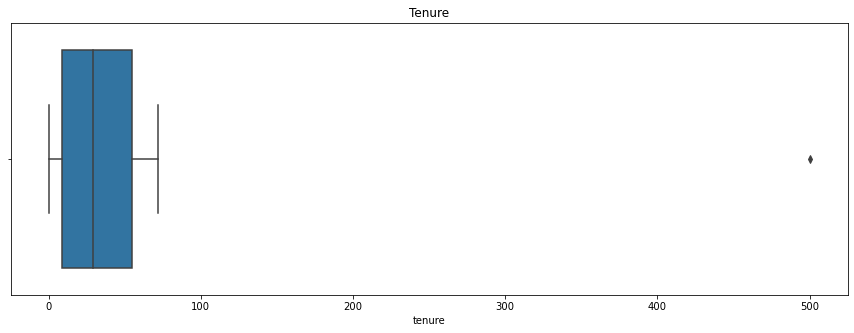

In [ ]:
# tenure
plt.figure(figsize=(15,5))
plt.title('Tenure')
sns.boxplot(x=df['tenure'])
plt.show()


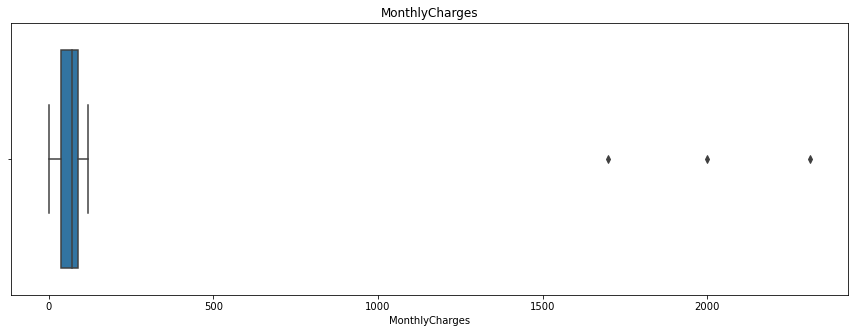

In [ ]:
plt.figure(figsize = (15,5))
plt.title('MonthlyCharges')
sns.boxplot(x=df['MonthlyCharges'])
plt.show()


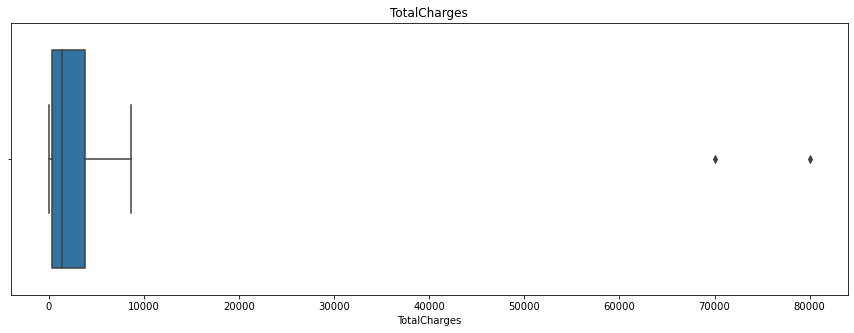

In [ ]:
plt.figure(figsize=(15,5))
plt.title('TotalCharges')
sns.boxplot(x=df['TotalCharges'])
plt.show()

## VII. Eleminate Outliers

#### Handling with IQR (Inter Quartile Range)

In [ ]:
#Quantile 1
Q1 = df[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)

In [ ]:
#Quantile 3
Q3 = df[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
Q3

tenure              55.0000
MonthlyCharges      89.8500
TotalCharges      3799.8375
Name: 0.75, dtype: float64

In [ ]:
# IQR
IQR = Q3 - Q1
IQR

tenure              46.0000
MonthlyCharges      53.3875
TotalCharges      3392.8625
dtype: float64

In [ ]:
# The maximum value of each variable
maximum = Q3 + (1.5*IQR)
maximum

tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

In [ ]:
# The minimum value of each variable
minimum = Q1 - (1.5*IQR)
minimum

tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

In [ ]:
more_than = df > maximum
lower_than = df < minimum

In [ ]:
df = df.mask(more_than, maximum, axis=1) 
df = df.mask(lower_than, minimum, axis=1)

In [ ]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


In [ ]:
# df = df[(df['MonthlyCharges'] < maximum['MonthlyCharges']) & (df['MonthlyCharges'] > minimum['MonthlyCharges'])]

## VIII. Nonstandard Value Detection

In [ ]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

## IX. Standardization of Categorical Variables

Its known that the variables that must must be standardized are :
- Gender (Male, Female, Wanita, Laki-Laki) -> (Male,Female)
- Dependents (No,Yes,Iya) -> (No,Yes)
- Churn (No,Yes,Churn) -> (No,Yes)

In [ ]:
df = df.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

In [ ]:
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
